# 1.1 Dataset Upload and Initial Inspection

In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/My Drive/Bengali hate speech .csv"
df = pd.read_csv(dataset_path)

# Display dataset information
print("Dataset Overview:")
print(df.info())
# Display first few rows
#df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  30000 non-null  object
 1   hate      30000 non-null  int64 
 2   category  30000 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.3+ KB
None


# 1.2 Exploratory Data Analysis (EDA)

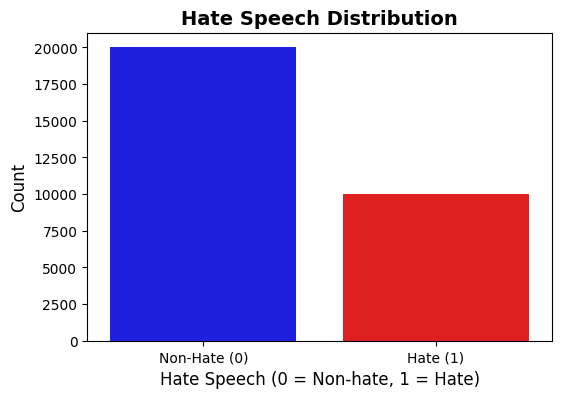

In [ ]:
#1.2.1 Distribution of Hate Speech Labels
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors
custom_palette = {0: 'blue', 1: 'red'}  # Green for Non-Hate, Red for Hate

plt.figure(figsize=(6,4))

# Create countplot with manually assigned colors
sns.countplot(data=df, x='hate', hue='hate', palette=custom_palette, legend=False)

# Titles and labels
plt.title("Hate Speech Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Hate Speech (0 = Non-hate, 1 = Hate)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['Non-Hate (0)', 'Hate (1)'])

# Show the plot
plt.show()



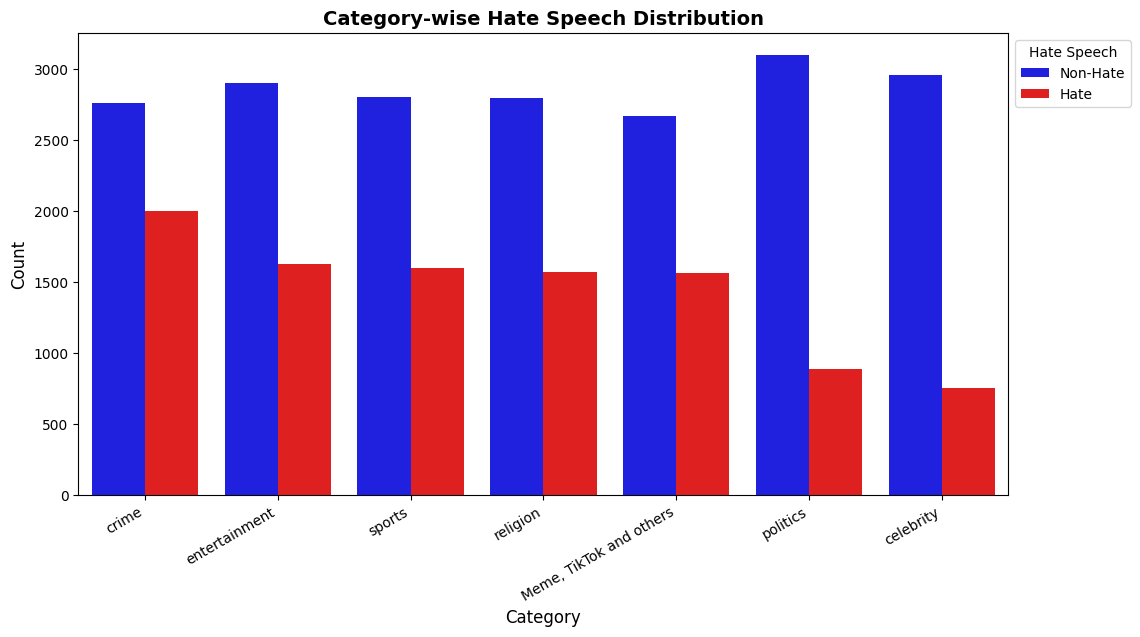

In [ ]:
#1.2.2 Category-wise Distribution of Hate Speech
plt.figure(figsize=(12,6))

# Custom color palette for better visibility
custom_palette = {0: 'blue', 1: 'red'}

# Create countplot with improved aesthetics
sns.countplot(
    data=df,
    x='category',
    hue='hate',
    palette=custom_palette,
    order=df['category'].value_counts().index
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Titles and labels
plt.title("Category-wise Hate Speech Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Move legend outside the plot
plt.legend(title="Hate Speech", labels=["Non-Hate", "Hate"], loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


# 1.3 Data Cleaning and Preprocessing

In [ ]:
# Install necessary libraries
!pip install banglanltk
!pip install bnltk
!pip install emoji
!pip install transformers
!pip install datasets
!pip install clean-text
!pip install nltk
!pip install pandas



  Using cached bnltk-0.7.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached bnltk-0.7.8-py3-none-any.whl (15 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not curren

In [ ]:
!pip install indic-nlp-library transformers bnltk


In [ ]:
!pip uninstall -y numpy transformers
!pip install --upgrade numpy==1.26.4


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: transformers 4.49.0
Uninstalling transformers-4.49.0:
  Successfully uninstalled transformers-4.49.0
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, which is not installed.
peft 0.14.0 requires transformers, which is not installed.
bnlp-toolkit 4.0.3 requires scipy==1.10.1, but you have scipy 1.15.2 which is incompatible.
bnltk 0.7.8 requires numpy==2.0.2, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade transformers


  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
Using cached transformers-4.49.0-py3-none-any.whl (10.0 MB)


In [ ]:
import re
import pandas as pd
from indicnlp.tokenize import indic_tokenize
from transformers import AutoTokenizer
from bnltk.stemmer import BanglaStemmer


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load Bengali stopwords
stop_words = set(stopwords.words('bengali'))

# Function to clean text
def clean_text(text):
    text = str(text).strip().lower()  # Convert to lowercase & strip spaces
    text = re.sub(r'[a-zA-Z0-9]', '', text)  # Remove English words & numbers
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)  # Keep only Bengali characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


df['clean_sentence'] = df['sentence'].apply(clean_text)  # Step 1: Clean text

# Step 2: Remove stopwords after cleaning
df['clean_sentence_ml'] = df['clean_sentence'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

# Check the cleaned sentences
print(df['clean_sentence_ml'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                            যত্তসব পাপন শালার ফাজলামী
1                          পাপন শালা রে রিমান্ডে দরকার
2    জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ একটা দে...
3                             শালা লুচ্চা পাঠার মত যায়
4         তুই শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব
Name: clean_sentence_ml, dtype: object


In [ ]:
# Install necessary library
!pip install indic-nlp-library

In [ ]:
import re
from indicnlp.tokenize import indic_tokenize
from transformers import AutoTokenizer

# Tokenization using Indic NLP
def tokenize_text(text):
    return indic_tokenize.trivial_tokenize(text, lang="bn")

df['tokenized_sentence'] = df['clean_sentence_ml'].apply(tokenize_text)

# Display tokenized dataset
df[['clean_sentence_ml', 'tokenized_sentence']].head(10)

,clean_sentence_ml,tokenized_sentence
0,যত্তসব পাপন শালার ফাজলামী,"[যত্তসব, পাপন, শালার, ফাজলামী]"
1,পাপন শালা রে রিমান্ডে দরকার,"[পাপন, শালা, রে, রিমান্ডে, দরকার]"
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ একটা দে...,"[জিল্লুর, রহমান, স্যারের, ছেলে, এতো, বড়, জারজ,..."
3,শালা লুচ্চা পাঠার মত যায়,"[শালা, লুচ্চা, পাঠার, মত, যায়]"
4,তুই শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,"[তুই, শালা, গাজা, খাইছচতুর, মার, হেডায়, খেলবে,..."
5,কুন দরনের কেলা ফাইজলামি তাস্কিন রে চর মারা দরকার,"[কুন, দরনের, কেলা, ফাইজলামি, তাস্কিন, রে, চর, ..."
6,পাপন ভর মাদা চোদ পাপনে পদতেক চাই,"[পাপন, ভর, মাদা, চোদ, পাপনে, পদতেক, চাই]"
7,দুরো সালার পুদ চুপথাক,"[দুরো, সালার, পুদ, চুপথাক]"
8,কুত্তার বাছচা পাপন,"[কুত্তার, বাছচা, পাপন]"
9,বাল ছাল তর সাউয়া,"[বাল, ছাল, তর, সাউয়া]"


In [ ]:
# Load tokenizer for Bangla BERT
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

# Tokenizing sentences for Transformer models
def transformer_tokenization(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )

df['tokenized_sentence_bert'] = df['clean_sentence'].apply(lambda x: transformer_tokenization(x)['input_ids'].squeeze().tolist())

# Display tokenized dataset
df[['clean_sentence', 'tokenized_sentence_bert']].head(10)


,clean_sentence,tokenized_sentence_bert
0,যত্তসব পাপন শালার ফাজলামী,"[101, 3015, 3283, 6509, 50146, 42443, 2046, 97..."
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,"[101, 50146, 42443, 4972, 68827, 10382, 55107,..."
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,"[101, 25144, 2756, 2046, 2188, 3091, 14979, 20..."
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,"[101, 42443, 6068, 7464, 9321, 2543, 4277, 318..."
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,"[101, 10185, 2062, 4058, 2395, 42443, 14019, 1..."
5,এটা কুন দরনের কেলা ফাইজলামি তাস্কিন রে চর মারা...,"[101, 2197, 11765, 5234, 5931, 36599, 2395, 80..."
6,পাপন ভর মাদা চোদ পাপনে পদতেক চাই,"[101, 50146, 3297, 55427, 10790, 20610, 50146,..."
7,দুরো সালার পুদ চুপথাক,"[101, 6539, 2395, 2396, 3187, 3465, 24809, 630..."
8,কুত্তার বাছচা পাপন,"[101, 2657, 4305, 63544, 9321, 50146, 102, 0, ..."
9,বাল ছাল তর সাউয়া,"[101, 16664, 25582, 20813, 41092, 7724, 102, 0..."


In [ ]:
from IPython.display import display

# Display 5 random rows from the dataset
display(df.sample(n=5, random_state=None))


,sentence,hate,category,clean_sentence,tokenized_sentence,tokenized_sentence_bert,clean_sentence_ml
20287,দেওয়ানবাগী রে যদি পাইতাম আগে রড গরম করতাম একদম...,0,religion,দেওয়ানবাগী রে যদি পাইতাম আগে রড গরম করতাম একদম...,"[দেওয়ানবাগী, রে, পাইতাম, রড, গরম, করতাম, একদম,...","[101, 21380, 19264, 13310, 2765, 4972, 2166, 9...",দেওয়ানবাগী রে পাইতাম রড গরম করতাম একদম লাল পাছ...
10587,কেউ বলে আমেরিকায় চলে যাচ্ছে কেউ বলে ইংলেন্ড যা...,0,sports,কেউ বলে আমেরিকায় চলে যাচ্ছে কেউ বলে ইংলেন্ড যা...,"[আমেরিকায়, ইংলেন্ড, কতটা, সত্য, জানিনা]","[101, 2253, 2080, 4839, 9294, 2289, 2120, 7464...",আমেরিকায় ইংলেন্ড কতটা সত্য জানিনা
20700,আপনার হাত বার বার একি স্টাইল করেন করেন কেন,0,religion,আপনার হাত বার বার একি স্টাইল করেন করেন কেন,"[হাত, একি, স্টাইল]","[101, 2373, 2690, 3128, 3128, 2066, 2454, 3091...",হাত একি স্টাইল
12433,সাব্বির কে? 🤔,0,sports,সাব্বির কে,[সাব্বির],"[101, 6491, 12031, 2285, 102, 0, 0, 0, 0, 0, 0...",সাব্বির
15325,আমি প্রতিদিন সাকিব খান এর সিনেমা না দেখলে আমার...,0,entertainment,আমি প্রতিদিন সাকিব খান এর সিনেমা না দেখলে আমার...,"[প্রতিদিন, সাকিব, খান, সিনেমা, দেখলে, ঘুম, আসে...","[101, 2169, 50569, 19592, 6459, 4798, 2328, 20...",প্রতিদিন সাকিব খান সিনেমা দেখলে ঘুম আসে নাকিন্...


In [ ]:

df.to_csv('/content/drive/My Drive/preprocessed_data_4114.csv', index=False)